In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import sklearn.datasets
import time
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from sklearn import datasets
from sklearn.datasets import (make_classification, make_blobs, make_gaussian_quantiles)
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from multiprocessing import Process
from math import pi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
# iris = datasets.load_iris()
# idx = iris.target != 2
# data = iris.data[idx].astype(np.float32)
# target = iris.target[idx].astype(np.float32)

# X_train, X_test, y_train, y_test = train_test_split(data, target, 
#                                 test_size = 0.2)

In [21]:
np.random.seed(66)
X, y = make_classification(n_samples=10000, n_features=16, n_informative=2, n_redundant=0, 
                                            n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, 
                                            flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
data = X_train
target = y_train
rows, columns = data.shape

#defining a function for the projections unto the ith sets
def altProj(x, i):
    separation_vector = x + (min(0, target[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    #separation_vector = x + (min(0, target[i] - beta[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    return separation_vector

#The cyclic projection algorithm
tol = 1e-10
iterate = 0
iterate_counter = []
norm_counter = []
residual = 5

beta = np.ones(len(target))
x_start = np.ones(columns)
norm_counter.append(norm(x_start))
iterate_counter.append(0)
#for iterate in range(100):
while residual > tol:
    for rows in range(rows):
        y = altProj(x_start, rows)
        x_start = y
        print(y)
        iterate += 1
        iterate_counter.append(iterate)
        print(iterate)
        norm_counter.append(norm(x_start))
        residual = abs(norm_counter[-1] - norm_counter[-2])
#         if residual < tol:
#             break


predict_array = data@x_start


#Converting classified arrays to binary arrays

def array_to_binary(array):
    count_one = 0
    count_zero = 0
    binary_array = []

    for elements in array:
        if elements >= 0:
            output = 1
            binary_array.append(output)
            count_one += 1
        else:
            output = 0
            binary_array.append(output)
            count_zero +=1
    
    return binary_array

predicted_class = array_to_binary(predict_array)


# num_zeros_classify = 0
# num_ones_classify = 0

# num_zeros_counter = []
# num_ones_counter = []
# predicted_class = []


# #for element in predict_array:
# for element in np.nditer(predict_array):
#     if element >= 0:
#         output = 1
#         predicted_class.append(output)
#         num_ones_classify += 1
#     else:
#         output = 0
#         predicted_class.append(output)
#         num_zeros_classify +=1

[0.63038881 1.31411647 1.21716949 0.56962952 0.68490362 0.92736239
 0.69233984 1.02011637 0.65023856 0.83732566 1.26131947 1.43419312
 0.70241699 0.9907584  0.82507852 0.43747199]
1
[0.63093087 1.31321416 1.21772579 0.56943092 0.68434058 0.92688031
 0.69239593 1.01892146 0.65004616 0.83760627 1.26221575 1.43423238
 0.70235927 0.99201564 0.82447597 0.43811556]
2
[0.63093087 1.31321416 1.21772579 0.56943092 0.68434058 0.92688031
 0.69239593 1.01892146 0.65004616 0.83760627 1.26221575 1.43423238
 0.70235927 0.99201564 0.82447597 0.43811556]
3
[0.70919969 1.25652354 1.45595686 0.55117226 0.75826383 0.77859017
 0.58083984 0.84912527 0.67524055 0.85190394 1.20721716 1.42524177
 0.80427322 0.85397026 0.8364262  0.48596617]
4
[0.49633887 1.12508476 1.20163646 0.61369824 0.57040945 0.72782835
 0.85725159 1.02868259 1.16714536 0.60367903 1.02943415 1.1682007
 1.03022324 0.82378709 0.50109481 0.60699463]
5
[0.49633887 1.12508476 1.20163646 0.61369824 0.57040945 0.72782835
 0.85725159 1.02868259 1

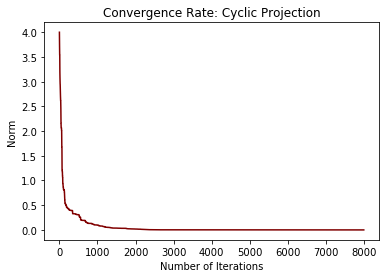

In [23]:
plt.figure()
plt.title("Convergence Rate: Cyclic Projection")
plt.plot(iterate_counter, norm_counter, c = "maroon")
plt.xlabel("Number of Iterations")
plt.ylabel("Norm")
plt.show()

In [24]:
#######TRAINING
##Performance measure of the algorithm
def projection_accuracy(target, prediction):
    right = 0
    for object in range(len(target)):
        if target[object] == prediction[object]:
            right += 1
    classification_accuracy = right / float(len(target)) * 100
    return classification_accuracy

classification_accuracy = projection_accuracy(target, predicted_class)
print("The Percentage Training Accuracy is {}%".format(classification_accuracy))

The Percentage Training Accuracy is 82.15%


In [25]:
#######TEST
##Performance measure of the algorithm

predict_array_test = X_test@x_start

predicted_class_test = array_to_binary(predict_array_test)

def projection_accuracy(y_test, predicted_class_test):
    right = 0
    for object in range(len(y_test)):
        if y_test[object] == predicted_class_test[object]:
            right += 1
    classification_accuracy = right / float(len(y_test)) * 100
    return classification_accuracy
classification_accuracy = projection_accuracy(y_test, predicted_class_test)
print("The Percentage Test Accuracy is: {:.4f}%".format(classification_accuracy))

The Percentage Test Accuracy is: 82.1000%


In [26]:
# calculate a confusion matrix
def confusionMatrix(target, predicted_class):
    cases = set(target)
    matrix = [list() for x in range(len(cases))]
    for i in range(len(cases)):
        matrix[i] = [0 for x in range(len(cases))]
    lookup = dict()
    for i, value in enumerate(cases):
        lookup[value] = i
    for i in range(len(target)):
        x = lookup[target[i]]
        y = lookup[predicted_class[i]]
        matrix[y][x] += 1
    return cases, matrix


def print_confusionMatrix(target, predicted_class):
    print("T" + " ".join(str(x) for x in cases))
    print("P***")
    for i, x in enumerate(cases):
        print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))
    

 
cases, matrix = confusionMatrix(target, predicted_class)
print_confusionMatrix(cases, matrix)

T0 1
P***
0| 3189 591
1| 837 3383


In [27]:
##Notations of Traditional Classifiers

lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 100)
svc = LinearSVC(C = 1.0)

In [28]:
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lr.score(X_train, y_train)

0.89375

In [30]:
lr.score(X_test, y_test)

0.8995

In [31]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[864, 114],
       [ 87, 935]])

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc.score(X_train, y_train)

1.0

In [34]:
rfc.score(X_test, y_test)

0.942

In [35]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[918,  60],
       [ 56, 966]])

In [36]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [37]:
svc.score(X_train, y_train)

0.893375

In [38]:
svc.score(X_test, y_test)

0.8985

In [39]:
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[861, 117],
       [ 86, 936]])

In [ ]:
##See this to plot the scatter diagram well--->>> www.python-course.eu/neural_networks_with_python_numpy.php
plt.scatter(data[:, 0], data[:, 1], marker='o', c=target,
            s=25, edgecolor='k')
plt.show()

plt.scatter(data[:, 0], data[:, 1], marker='o', c=predict_array,
            s=25, edgecolor='green')
plt.show()

In [ ]:
target_hist = [num_zeros, num_ones]
predict_hist = [num_zeros_classify, num_ones_classify]
category = np.arange(2)
#category = [0, 1]
tick_label = ['Zeros','Ones']
 
#X = np.arange(4)
plt.bar(category, target_hist, color = 'b', width = 0.4, label = "Target")
plt.bar(category + 0.2, predict_hist, color = 'g', width = 0.4, label = "Predict")
plt.legend()

# naming the x-axis 
plt.xlabel('Classes') 
# naming the y-axis 
plt.ylabel('Counts') 
# plot title 
plt.title('Bar Charts of the Target and Predict Data')


plt.show()


In [ ]:
#Compare with traditional separators

#KNN

#Random Forest

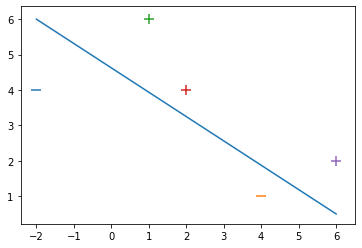

In [1]:
#Plot the separator

import numpy as np
from matplotlib import pyplot as plt
#2D data with bias
X = np.array([
    [-2, 4,-1],
[4, 1, -1],
[1,6,-1],
[2,4,-1],
[6,2,-1],
])

y = np.array([-1,-1,1,1,1])
errors = []
# Visualizing the data
for d, sample in enumerate(X):
    #Plot negative sample
    if d<2:
        plt.scatter(sample[0], sample[1], s = 120, marker='_', linewidths=2)
        
    #Plot positive sample:
    else:
        plt.scatter(sample[0], sample[1], s =120, marker = '+', linewidths = 2)
        
        
plt.plot([-2,6], [6,0.5])

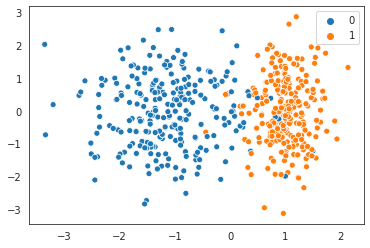

In [4]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [21]:
def function1(arrays):
    count_one = 0
    count_zero = 0
    find_class = []

    for points in arrays:
        if points >= 0:
            it = 1
            find_class.append(it)
            count_one += 1
        else:
            it = 0
            find_class.append(it)
            count_zero +=1
    
    return find_class

predicted_class = function1(predict_array)



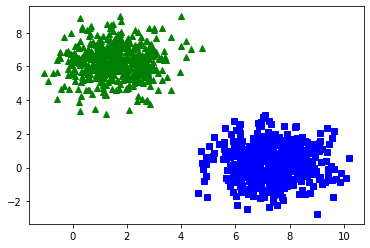

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)